# Import lib yang dibutuhkan
Untuk analysis memerlukan beberapa library ini untuk menganalisis data sebelum dilakukan proses modelling

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Take dataset
Untuk kali ini saya akan menggunakan dataset Dummy marketing and sales Data, yang berasal dari kaggle dengan link https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data/data

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harrimansaragih/dummy-advertising-and-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/harrimansaragih/dummy-advertising-and-sales-data/versions/1


Pindahkan file yang telah didownload ke directory yang sedang kita gunakan


In [7]:
import os
# Create the target directory if it doesn't exist
os.makedirs("./files", exist_ok=True)

# Move the files from the source to the target directory
!mv  /root/.cache/kagglehub/datasets/harrimansaragih/dummy-advertising-and-sales-data/versions/1/* ./files
print("Files moved to ./files directory")

mv: cannot stat '/root/.cache/kagglehub/datasets/harrimansaragih/dummy-advertising-and-sales-data/versions/1/*': No such file or directory
Files moved to ./files directory


gunakan pandas dataframe untuk mengambil data

# lakukan pengecekan data

In [8]:
sales=pd.read_csv('files/Dummy Data HSS.csv')

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [10]:
sales.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [11]:
sales.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


# Lakukan pengecekkan untuk mencari data yang kosong dan duplikat

In [12]:
sales.isna().sum()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


In [13]:
sales.duplicated().sum()

0

Sepertinya tidak ada data yang kosong dan duplikat

Selanjutnya kita akan mencari data yang mempunyai value 0

In [14]:
def count_zeros(column):
    return (column == 0).sum()

# Aplikasikan fungsi pada seluruh kolom dan tampilkan hasilnya
zero_counts = sales.apply(count_zeros)
print(zero_counts)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


Dengan adanya beberapa sel yang memiliki value NA, kita dapat menghapus sel tersebut

In [15]:
sales.dropna(inplace=True)

In [16]:
sales.isna().sum()

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


Dengan begini maka kita bisa tetap melakukan analisis data. Selanjutnya kita harus melakukan identifikasi outlier

<Axes: xlabel='Social Media'>

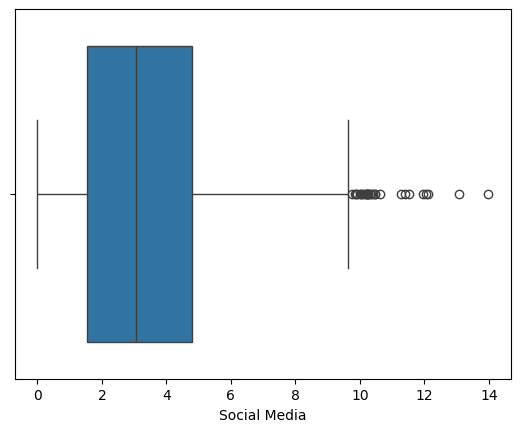

In [17]:
sns.boxplot(x=sales['Social Media'])

Di social media ada beberapa outlier yang perlu ditangani, oleh karena itu kita harus menanganinya dengan:

In [18]:
Q1 = sales.quantile(0.25,numeric_only=True)
Q3 = sales.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1

# Create a boolean mask that will indicate the rows to keep
mask = pd.Series(True, index=sales.index) # Initialize mask with all True

for col in sales.columns:
    if pd.api.types.is_numeric_dtype(sales[col]): #check if column is numeric
        mask = mask & ~((sales[col] < (Q1[col] - 1.5 * IQR[col])) | (sales[col] > (Q3[col] + 1.5 * IQR[col]))) # apply the filtering condition per column

sales=sales[mask]
sales.shape

(4517, 5)

<Axes: xlabel='Social Media'>

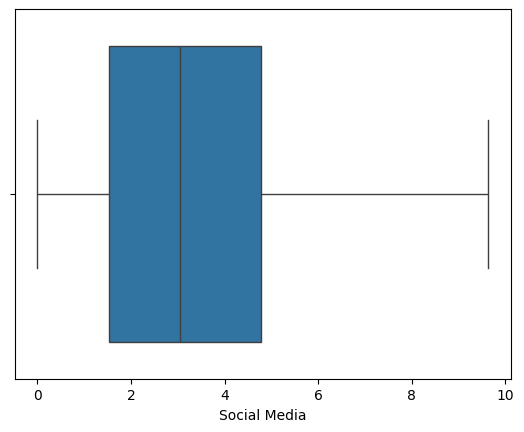

In [19]:
sns.boxplot(x=sales['Social Media'])

Bisa dilihat bahwa outlier telah ditangani

# EDA
## Univariate analysis
univariate analysis adalah teknik yang digunakan untuk analysis data secara 1 per 1 tanpa melihat korelasi antar data

In [20]:
numerical_features = ['TV', 'Radio', 'Social Media', 'Sales']
categorical_features = ['Influencer']

### Categorical Feature

            jumlah sampel  persentase
Influencer                           
Micro                1143        25.3
Mega                 1140        25.2
Nano                 1129        25.0
Macro                1105        24.5


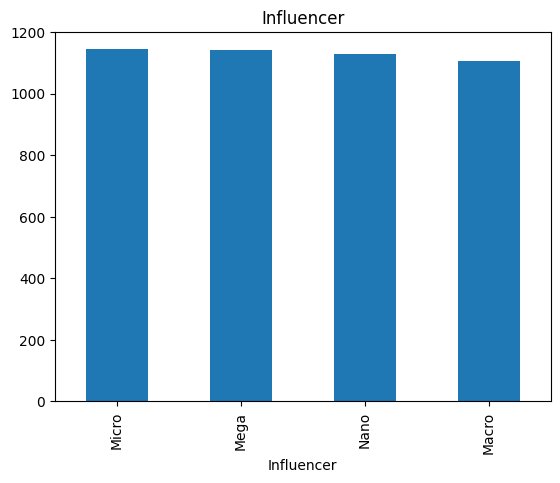

In [21]:
feature = categorical_features[0]
count = sales[feature].value_counts()
percent = 100*sales[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Bisa dilihat dengan ketiga influencer hampir memliki jumlah data yang sama

Numerical Feature

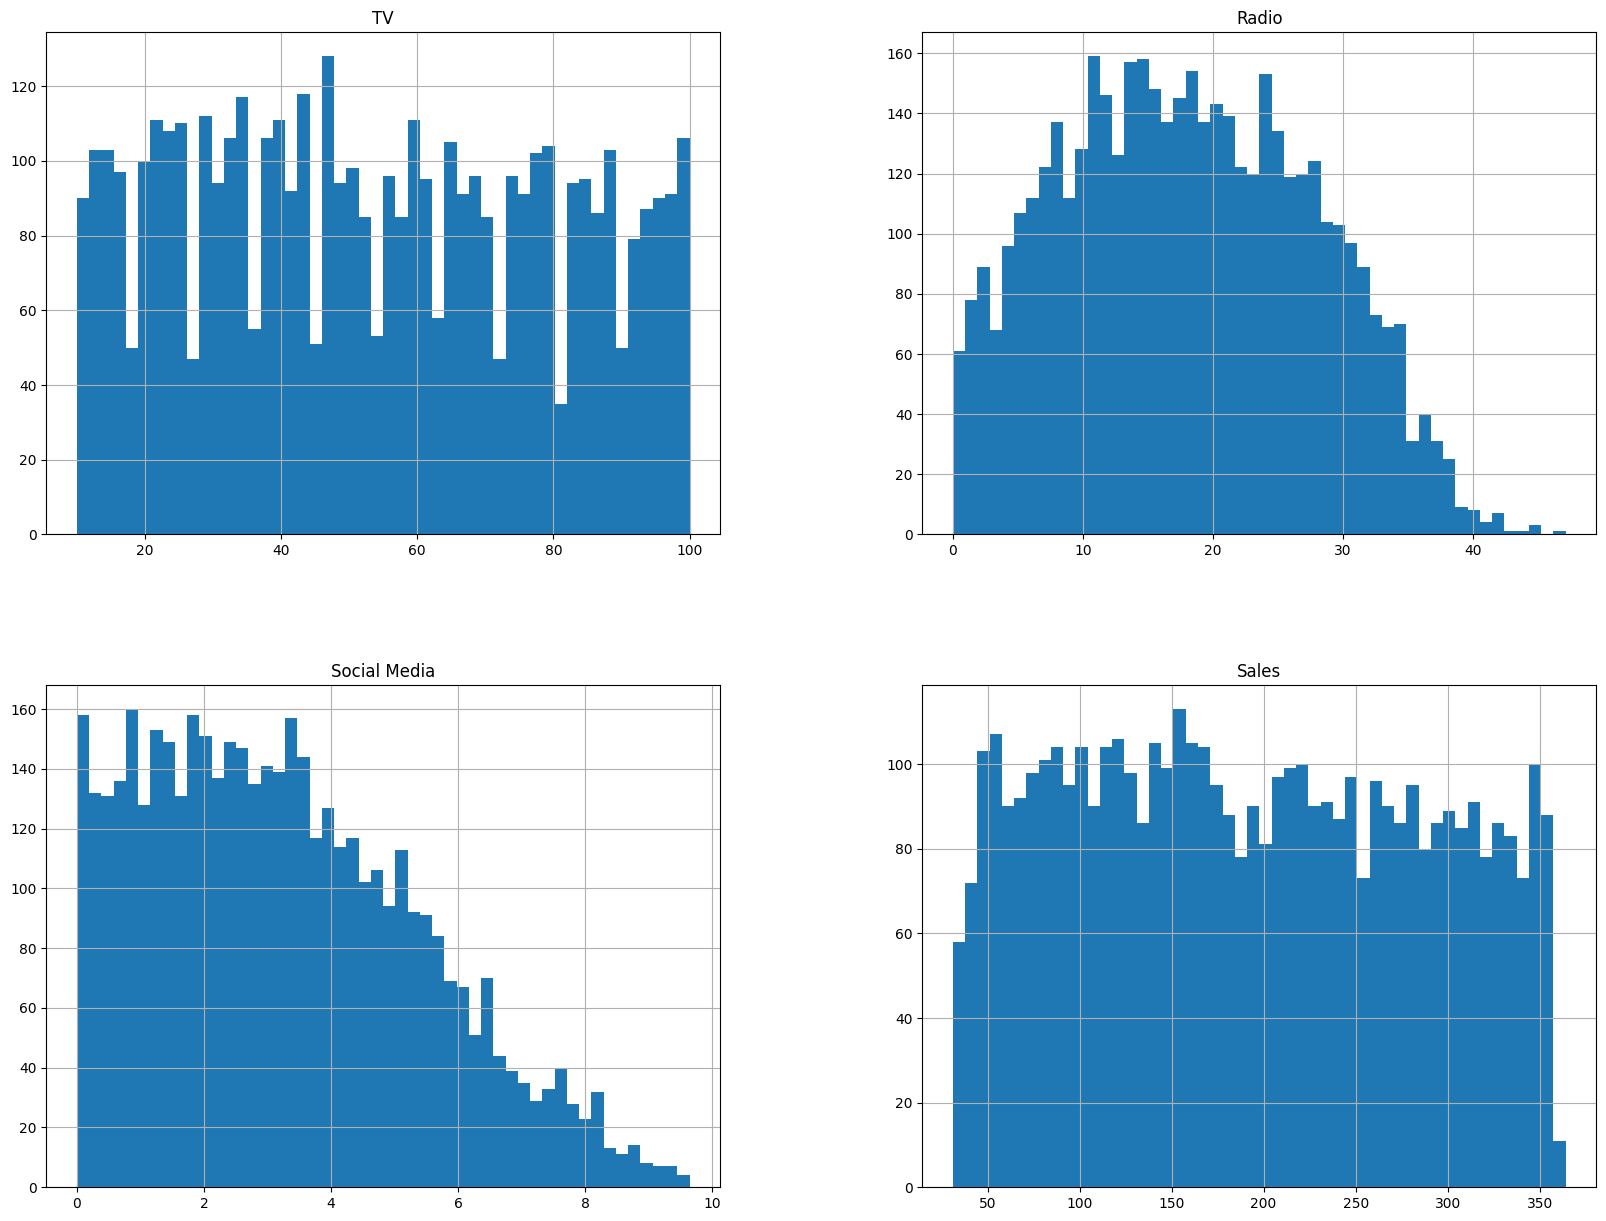

In [22]:
sales.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate analysis

### Categorial analysis

<ipython-input-23-94b504300548>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Sales", kind="bar", dodge=False, height = 4, aspect = 3,  data=sales, palette="Set3")


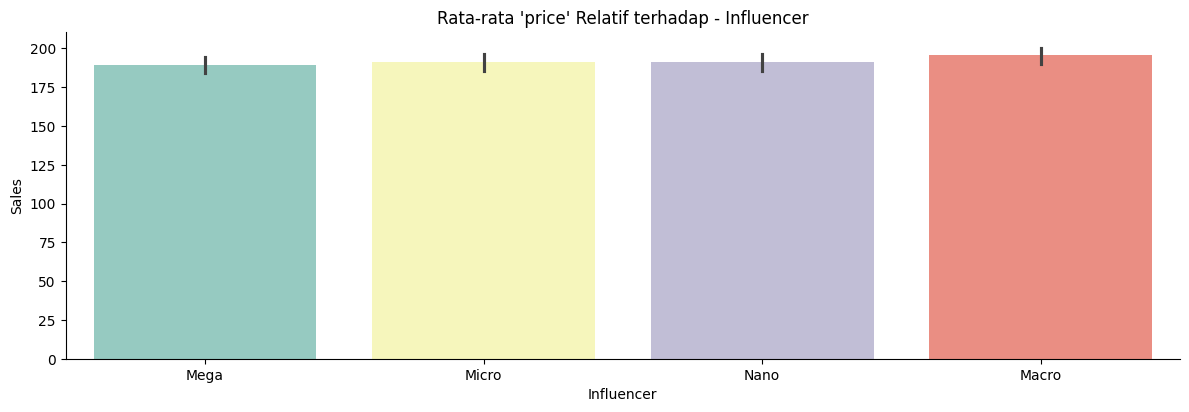

In [23]:
cat_features = sales.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Sales", kind="bar", dodge=False, height = 4, aspect = 3,  data=sales, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Bisa dilihat bahwa influencer: mega, micro, nano, dan macro hampir memiliki jumlah sales yang sama

### Numerical analysis

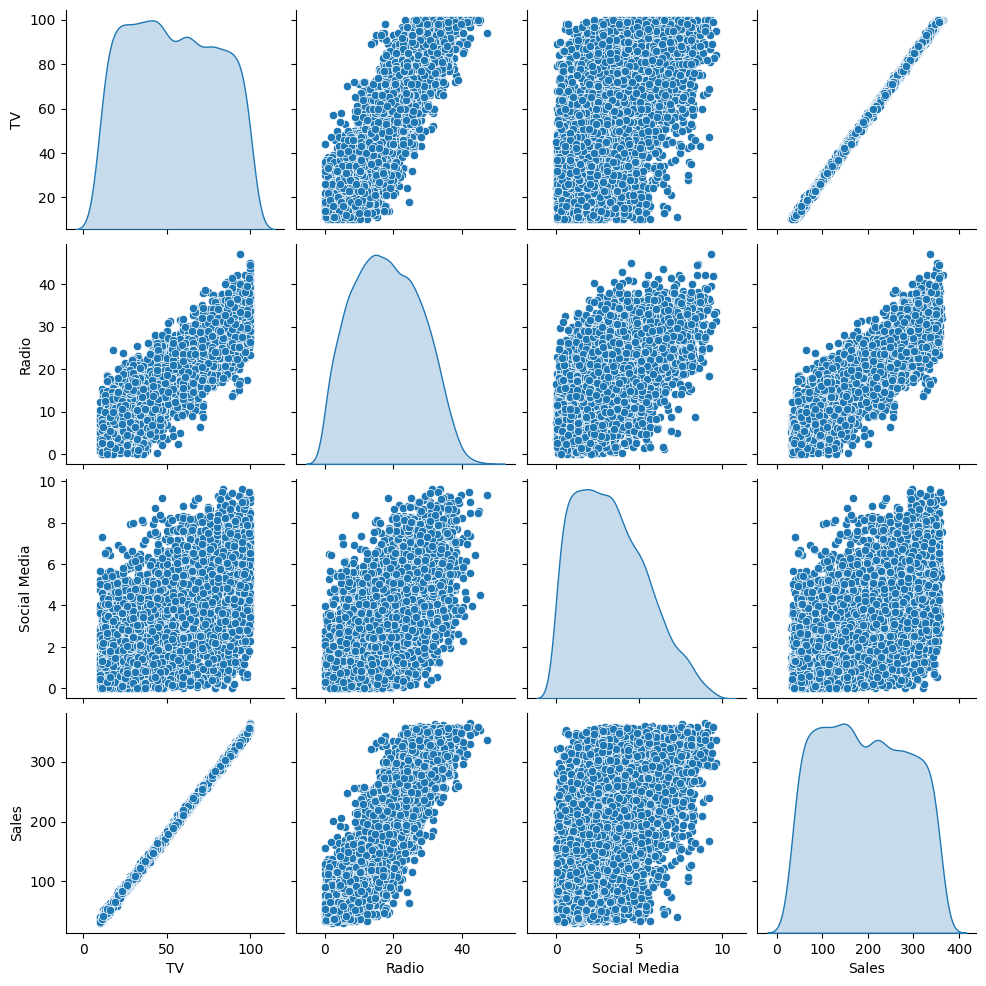

In [24]:
sns.pairplot(sales, diag_kind = 'kde')

**Correlation matrix untuk fitur numerik**

correlation matrix berikisar 1 sampai -1
*   mendekati 1 artinya berkorelasi naik
*   mendekati 0 artinya tidak berkorelasi
*   mendekati -1 artinya berkorelasi turun

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

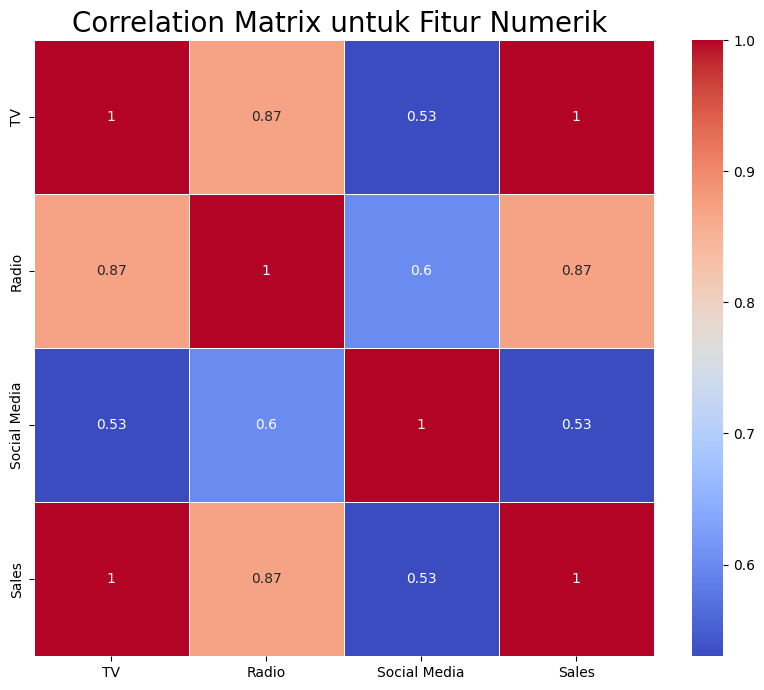

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = sales[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Bisa dilihat dari beberapa numerical feature yang ada memang memiliki korelasi satu sama lain, meskipun social media merupakan yang terlemah

#Encoding fitur kategori
agar algo ML berjalan dengan lancar maka, kita memerlukan untuk melakukan encoding untuk kategori

In [26]:
# from sklearn.preprocessing import  OneHotEncoder
sales = pd.concat([sales, pd.get_dummies(sales['Influencer'], prefix='Influencer')],axis=1)
sales.drop(['Influencer'], axis=1, inplace=True)
sales.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


# Reduksi dengan PCA
Sepertinya reduksi dengan metode PCA tidak perlu dilakukan karena fitur numerik sudah sedikit jadi tidak perlu direduksi kembali

# Train - Test Split

Untuk train-test split kita menggunakan split 90:10. Yang berarti data training 90% dan data test 10%

In [27]:
from sklearn.model_selection import train_test_split

X = sales.drop(["Sales"],axis =1) #data
y = sales["Sales"] #label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [28]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4517
Total # of sample in train dataset: 4065
Total # of sample in test dataset: 452



# Standarization
digunakan untuk algo ML memiliki peforma yang lebih baik dan lebih cepat ketika training. Hanya digunakan untuk fitur numerik. Menggunakan teknik StandarScaler dari lib scikitlearn.StandardScalaer mengurangkan mean, kemudian membaginya dengan standar deviasa untuk menggeser distribusi, maka nilai akan berada di antara -1 dan 1.Hanya dilakukan pada data training. Pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [29]:
X_train.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
1559,77.0,21.523224,3.905081,False,False,False,True
2256,57.0,23.219938,3.253903,False,True,False,False
777,80.0,26.454666,7.956071,False,False,False,True
2510,73.0,27.555490,2.927052,False,False,True,False
4105,72.0,34.512435,6.146297,False,True,False,False


In [30]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['TV', 'Radio', 'Social Media']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,TV,Radio,Social Media
1559,0.884358,0.358244,0.290902
2256,0.116640,0.534931,-0.013768
777,0.999515,0.871779,2.186258
2510,0.730814,0.986413,-0.166693
4105,0.692428,1.710873,1.339511


In [31]:
X_train.describe().round(4)

,TV,Radio,Social Media
count,4065.0000,4065.0000,4065.0000
mean,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-1.6875,-1.8830,-1.5362
25%,-0.8430,-0.7895,-0.8243
50%,-0.0369,-0.0304,-0.1067
75%,0.8460,0.7709,0.7035
max,1.7672,3.0234,2.9736


Dengan begini maka data siap untuk ditrain untuk mendapatkan hasil yang maksimal

# Model Development
Pada model development ini kita menggunakan 3 algoritma. Lalu menentukan mana yang memberikan hasil prediksi terbaik, yang digunakan:
*   K-Nearest Neighbor
*   Random Forest
*   Boosting Algo






Menyiapkan DF untuk analisis model

In [32]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
#n_neighbor berarti berapa neighbor yang dipakai untuk mencari jarak
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

RF

In [34]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 #Perhatikanlah potongan kode di atas.
 # Pertama, Anda mengimpor RandomForestRegressor dari library scikit-learn.
 #Anda juga mengimpor mean_squared_error sebagai metrik untuk mengevaluasi performa model.

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Boosting (adaboost)

In [35]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

kita akan menggunakan mse

Pertama kita akan melakukan standarisasi pada data tes

In [36]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


In [37]:
X_test.describe()

,TV,Radio,Social Media
count,452.000000,452.000000,452.000000
mean,-0.033846,-0.026411,-0.032611
std,1.002343,0.999288,0.996113
min,-1.687496,-1.881563,-1.524742
25%,-0.890989,-0.799072,-0.811172
50%,-0.075289,-0.059503,-0.181580
75%,0.769200,0.745264,0.619096
max,1.767233,2.673938,2.897694


Selanjutnya kita lakukan evaluasi

In [38]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.066774,0.087716
RF,0.001631,0.01067
Boosting,0.121198,0.132668


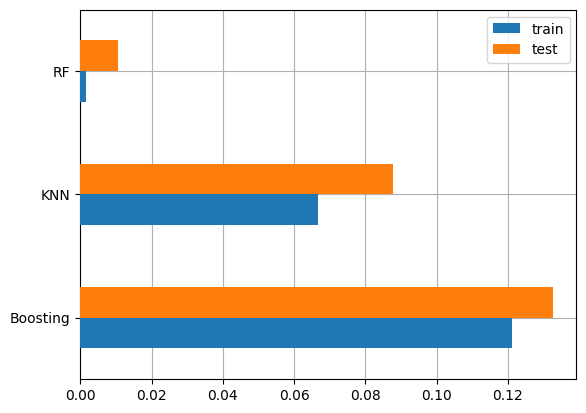

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [39]:
prediksi = X_test.iloc[:1000].copy()
pred_dict = {'y_true':y_test[:1000]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2842,80.424952,86.9,78.7,95.8
250,97.200553,98.5,100.8,96.1
2984,82.792088,82.3,81.1,96.1
645,193.398946,194.9,196.0,211.4
3644,104.421182,103.6,101.8,96.1
...,...,...,...,...
3712,120.252124,110.8,116.6,134.6
2673,225.409374,228.9,226.1,216.2
2139,204.046137,206.7,205.3,216.2
1817,162.161589,164.7,170.7,173.9


Bedasarkan 3 algo ML yang memiliki score paling baik adalah Boosting